In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
# 패션 MNIST 데이터셋 로딩
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

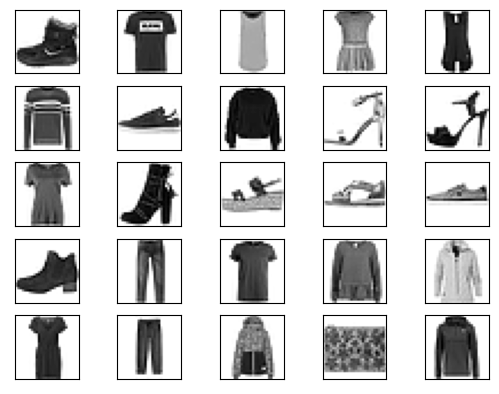

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boots']
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

## CNN을 사용하지 않고 분류해보기

In [4]:
X_train, X_test, = X_train / 255.0, X_test / 255.0

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5288 - accuracy: 0.8128
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3983 - accuracy: 0.8552
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8666
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3443 - accuracy: 0.8743
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3291 - accuracy: 0.8791
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3165 - accuracy: 0.8830
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3068 - accuracy: 0.8852
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8886
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2891 - accuracy: 0.8924
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.281

[0.3397529423236847, 0.8823000192642212]

## CNN으로 Fashion MNIST 분석하기

In [6]:
X_train.reshape(-1,28,28,1).shape

(60000, 28, 28, 1)

In [7]:
X_train_final = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_final = X_test.reshape(-1, 28, 28, 1) / 255.0

In [8]:
model_with_conv = Sequential()
model_with_conv.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_with_conv.add(MaxPooling2D((2, 2), strides=2))
model_with_conv.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_with_conv.add(MaxPooling2D((2, 2), strides=2))
model_with_conv.add(Flatten())
model_with_conv.add(Dense(128, activation='relu'))
model_with_conv.add(Dense(10, activation='softmax'))

model_with_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [9]:
model_with_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model_with_conv.fit(X_train_final, y_train, epochs=10)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8129 - accuracy: 0.7011
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5225 - accuracy: 0.8069
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4519 - accuracy: 0.8360
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4097 - accuracy: 0.8520
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3828 - accuracy: 0.8620
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3625 - accuracy: 0.8671
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3460 - accuracy: 0.8728
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3322 - accuracy: 0.8788
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3185 - accuracy: 0.8830
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

[0.34519249200820923, 0.8776000142097473]

# 전이학습
* 대량의 데이터셋을 이용해서 사전에 학습하고 만들어진 모델의 가중치를 가져와 우리가 원하는 분석에 활용하는 것
* 사전 훈련된 모델을 가져와서 커스터마이징 하는것을 Fine-tuning이라고 한다.
* 1) 특성 추출법: 사전 훈련된 모델을 가져온 후 마지막 완전연결층 부분만 새로 만듦
    * 합성곱층: 합성곱층과 플링층으로 구성
    * 완전연결층: 데이터분류기, 추출된 특성을 입력받아 최종적으로 이미지 분류 수행
    * Xception
    * Inception V3
    * ResNet50
    * VGG16
    * VGG19
    * MobileNet


### ResNet50 모델을 사용해서 개와 고양이 분류하기

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg 

In [12]:
base_model = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
                     pooling=None, classes=1000)

In [13]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [14]:
# 우리 모델 추가하기
model.trainable=False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_4 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
modelpath='./model/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [16]:
batch_size=16
image_height=224
image_width=224
train_dir="./data/catanddog/train/"
test_dir="./data/catanddog/validation/"

In [17]:
# 다양한 이미지 샘플을 만들기 위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255.0,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
)
train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')
valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [18]:
history = model.fit(train_generator, epochs=2000, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 0.69383, saving model to ./model\01-0.5000.hdf5
25/25 - 22s - loss: 0.6850 - accuracy: 0.6468 - val_loss: 0.6938 - val_accuracy: 0.5000 - 22s/epoch - 895ms/step
Epoch 2/2000

Epoch 2: val_loss did not improve from 0.69383
25/25 - 11s - loss: 0.6901 - accuracy: 0.5636 - val_loss: 0.6946 - val_accuracy: 0.5000 - 11s/epoch - 457ms/step
Epoch 3/2000

Epoch 3: val_loss did not improve from 0.69383
25/25 - 12s - loss: 0.6879 - accuracy: 0.5662 - val_loss: 0.6939 - val_accuracy: 0.5000 - 12s/epoch - 461ms/step
Epoch 4/2000

Epoch 4: val_loss did not improve from 0.69383
25/25 - 11s - loss: 0.6882 - accuracy: 0.5896 - val_loss: 0.6939 - val_accuracy: 0.5000 - 11s/epoch - 460ms/step
Epoch 5/2000

Epoch 5: val_loss did not improve from 0.69383
25/25 - 12s - loss: 0.6815 - accuracy: 0.6468 - val_loss: 0.6940 - val_accuracy: 0.5000 - 12s/epoch - 461ms/step
Epoch 6/2000

Epoch 6: val_loss improved from 0.69383 to 0.69374, saving model to ./model\

25/25 - 11s - loss: 0.6812 - accuracy: 0.5870 - val_loss: 0.6686 - val_accuracy: 0.6531 - 11s/epoch - 459ms/step
Epoch 47/2000

Epoch 47: val_loss did not improve from 0.66860
25/25 - 11s - loss: 0.6880 - accuracy: 0.5558 - val_loss: 0.6796 - val_accuracy: 0.5816 - 11s/epoch - 458ms/step
Epoch 48/2000

Epoch 48: val_loss improved from 0.66860 to 0.66710, saving model to ./model\48-0.6327.hdf5
25/25 - 12s - loss: 0.6885 - accuracy: 0.5455 - val_loss: 0.6671 - val_accuracy: 0.6327 - 12s/epoch - 495ms/step
Epoch 49/2000

Epoch 49: val_loss did not improve from 0.66710
25/25 - 11s - loss: 0.6867 - accuracy: 0.5610 - val_loss: 0.6888 - val_accuracy: 0.5408 - 11s/epoch - 460ms/step
Epoch 50/2000

Epoch 50: val_loss did not improve from 0.66710
25/25 - 11s - loss: 0.6820 - accuracy: 0.5792 - val_loss: 0.6830 - val_accuracy: 0.5510 - 11s/epoch - 460ms/step
Epoch 51/2000

Epoch 51: val_loss did not improve from 0.66710
25/25 - 12s - loss: 0.6833 - accuracy: 0.5662 - val_loss: 0.6850 - val_accur

Epoch 92/2000

Epoch 92: val_loss did not improve from 0.65661
25/25 - 11s - loss: 0.6981 - accuracy: 0.5273 - val_loss: 0.7122 - val_accuracy: 0.5000 - 11s/epoch - 456ms/step
Epoch 93/2000

Epoch 93: val_loss did not improve from 0.65661
25/25 - 11s - loss: 0.6921 - accuracy: 0.5481 - val_loss: 0.7071 - val_accuracy: 0.5000 - 11s/epoch - 457ms/step
Epoch 94/2000

Epoch 94: val_loss did not improve from 0.65661
25/25 - 11s - loss: 0.6891 - accuracy: 0.5455 - val_loss: 0.7079 - val_accuracy: 0.5000 - 11s/epoch - 459ms/step
Epoch 95/2000

Epoch 95: val_loss did not improve from 0.65661
25/25 - 12s - loss: 0.6852 - accuracy: 0.5506 - val_loss: 0.7072 - val_accuracy: 0.5000 - 12s/epoch - 466ms/step
Epoch 96/2000

Epoch 96: val_loss did not improve from 0.65661
25/25 - 12s - loss: 0.6844 - accuracy: 0.5740 - val_loss: 0.7061 - val_accuracy: 0.5000 - 12s/epoch - 467ms/step
Epoch 97/2000

Epoch 97: val_loss did not improve from 0.65661
25/25 - 12s - loss: 0.6816 - accuracy: 0.5844 - val_loss:

Epoch 138/2000

Epoch 138: val_loss did not improve from 0.63938
25/25 - 11s - loss: 0.6590 - accuracy: 0.6312 - val_loss: 0.6577 - val_accuracy: 0.6020 - 11s/epoch - 459ms/step
Epoch 139/2000

Epoch 139: val_loss did not improve from 0.63938
25/25 - 11s - loss: 0.6557 - accuracy: 0.6286 - val_loss: 0.6524 - val_accuracy: 0.6224 - 11s/epoch - 458ms/step
Epoch 140/2000

Epoch 140: val_loss did not improve from 0.63938
25/25 - 12s - loss: 0.6428 - accuracy: 0.6649 - val_loss: 0.6625 - val_accuracy: 0.6020 - 12s/epoch - 460ms/step
Epoch 141/2000

Epoch 141: val_loss did not improve from 0.63938
25/25 - 11s - loss: 0.6459 - accuracy: 0.6519 - val_loss: 0.6552 - val_accuracy: 0.6122 - 11s/epoch - 458ms/step
Epoch 142/2000

Epoch 142: val_loss did not improve from 0.63938
25/25 - 11s - loss: 0.6485 - accuracy: 0.6390 - val_loss: 0.6432 - val_accuracy: 0.6633 - 11s/epoch - 458ms/step
Epoch 143/2000

Epoch 143: val_loss did not improve from 0.63938
25/25 - 11s - loss: 0.6341 - accuracy: 0.6727

Epoch 184/2000

Epoch 184: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6703 - accuracy: 0.5844 - val_loss: 0.6703 - val_accuracy: 0.6020 - 11s/epoch - 458ms/step
Epoch 185/2000

Epoch 185: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6629 - accuracy: 0.6000 - val_loss: 0.6742 - val_accuracy: 0.5714 - 11s/epoch - 457ms/step
Epoch 186/2000

Epoch 186: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6645 - accuracy: 0.6078 - val_loss: 0.6813 - val_accuracy: 0.5714 - 11s/epoch - 457ms/step
Epoch 187/2000

Epoch 187: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6587 - accuracy: 0.6182 - val_loss: 0.6759 - val_accuracy: 0.5612 - 11s/epoch - 457ms/step
Epoch 188/2000

Epoch 188: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6600 - accuracy: 0.6078 - val_loss: 0.6571 - val_accuracy: 0.6122 - 11s/epoch - 459ms/step
Epoch 189/2000

Epoch 189: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6731 - accuracy: 0.5844


Epoch 230: val_loss did not improve from 0.61906
25/25 - 12s - loss: 0.6255 - accuracy: 0.6831 - val_loss: 0.6843 - val_accuracy: 0.6122 - 12s/epoch - 464ms/step
Epoch 231/2000

Epoch 231: val_loss did not improve from 0.61906
25/25 - 12s - loss: 0.6104 - accuracy: 0.7091 - val_loss: 0.6695 - val_accuracy: 0.6327 - 12s/epoch - 468ms/step
Epoch 232/2000

Epoch 232: val_loss did not improve from 0.61906
25/25 - 12s - loss: 0.6202 - accuracy: 0.6597 - val_loss: 0.6644 - val_accuracy: 0.6224 - 12s/epoch - 469ms/step
Epoch 233/2000

Epoch 233: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6091 - accuracy: 0.7065 - val_loss: 0.6609 - val_accuracy: 0.6327 - 11s/epoch - 458ms/step
Epoch 234/2000

Epoch 234: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6181 - accuracy: 0.6831 - val_loss: 0.7351 - val_accuracy: 0.5408 - 11s/epoch - 447ms/step
Epoch 235/2000

Epoch 235: val_loss did not improve from 0.61906
25/25 - 11s - loss: 0.6478 - accuracy: 0.6338 - val_loss: 0.

In [19]:
import matplotlib as mpl
import koreanize_matplotlib

Text(0.5, 1.0, '오차')

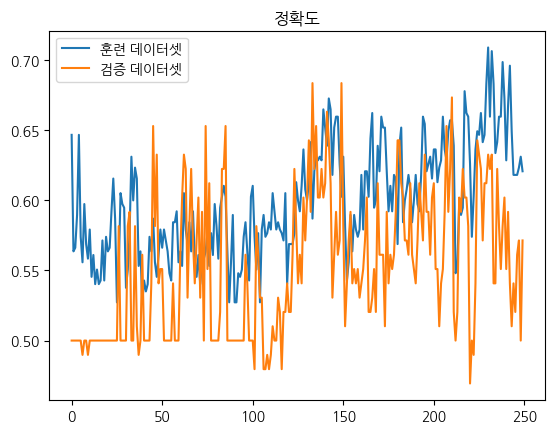

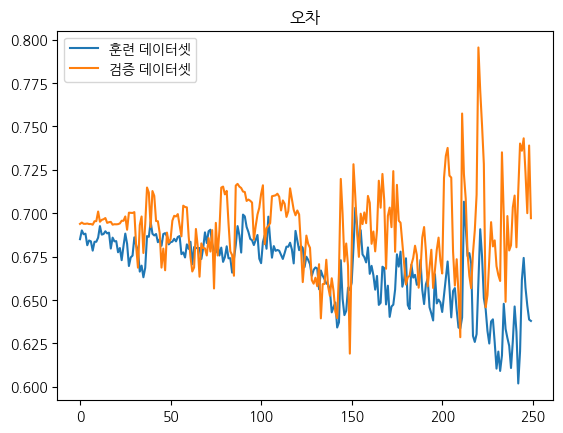

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, label='검증 데이터셋')
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.legend()
plt.title('오차')

1/1 [==============================] - 0s 31ms/step


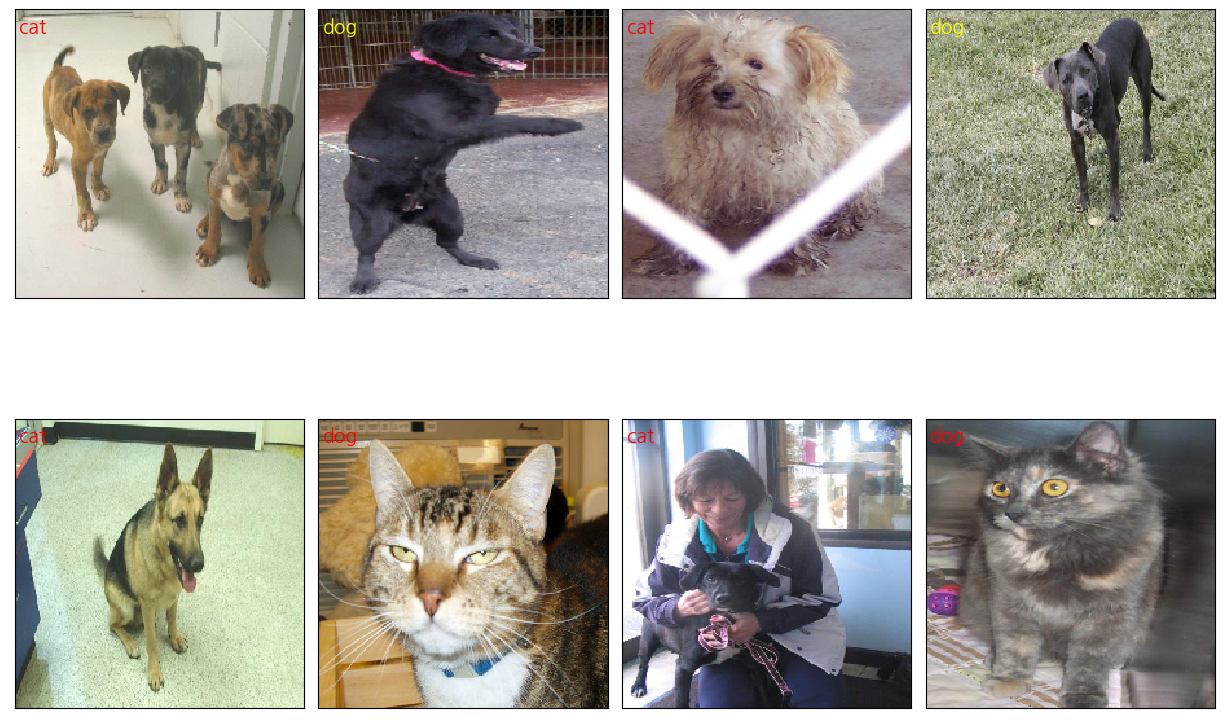

In [23]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3,17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3,17, class_names[prediction_values[i]], color='red', fontsize=14)

# 텐서플로 허브에서 모델 가져와 사용하기

In [24]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

In [25]:
# 다양한 이미지 샘플을 만들기 위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255.0,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
)
train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')
valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
modelpath='./model/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [27]:
history = model.fit(train_generator, epochs=20, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.10909, saving model to ./model\01-0.9694.hdf5
25/25 - 22s - loss: 0.4754 - accuracy: 0.7948 - val_loss: 0.1091 - val_accuracy: 0.9694 - 22s/epoch - 877ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.10909 to 0.06448, saving model to ./model\02-0.9694.hdf5
25/25 - 9s - loss: 0.0921 - accuracy: 0.9792 - val_loss: 0.0645 - val_accuracy: 0.9694 - 9s/epoch - 377ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.06448 to 0.05291, saving model to ./model\03-0.9694.hdf5
25/25 - 9s - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.0529 - val_accuracy: 0.9694 - 9s/epoch - 375ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.05291 to 0.04447, saving model to ./model\04-0.9898.hdf5


RuntimeError: Can't decrement id ref count (unable to extend file properly)

1/1 [==============================] - 2s 2s/step


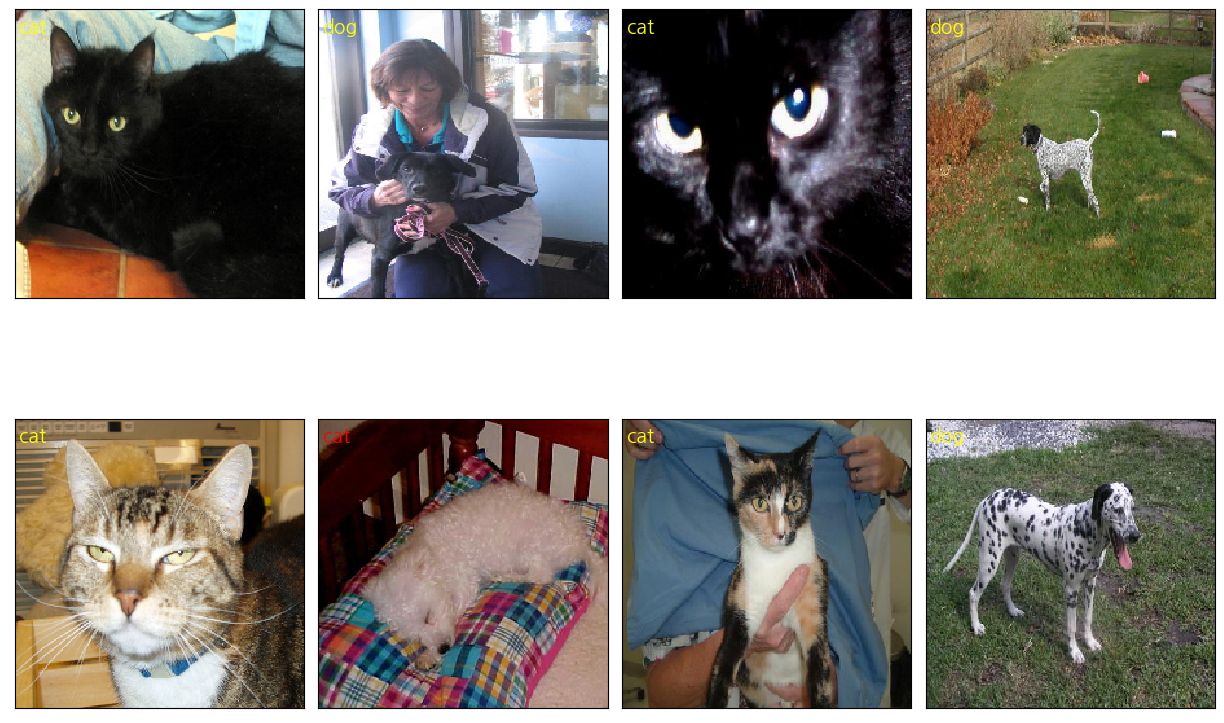

In [28]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3,17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3,17, class_names[prediction_values[i]], color='red', fontsize=14)